# **Import headers**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##  SKlearn libs for regressions
from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

##Importing Libraries for Neural Nets
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation
import math
from tqdm import tqdm
import pickle 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tqdm.keras import TqdmCallback

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100) 

# **Explore dataset**

#### **Explore raw data**

In [ ]:
fp = open('hockey_train/52563', 'r')

In [ ]:
lines = fp.readlines()

In [ ]:
for index, line in enumerate(lines):
    print("Line {}: {}".format(index, line.strip()))for 

Line 0: From: U16028@uicvm.uic.edu
Line 1: Subject: Re: Coloured puck (was: CHANGES NOT NOTED YET!)
Line 2: Article-I.D.: uicvm.93095.203829U16028
Line 3: Organization: University of Illinois at Chicago, academic Computer Center
Line 4: Lines: 15
Line 5: 
Line 6: In article <1993Apr5.171006.22196@bnr.ca>, dwarf@bcarh601.bnr.ca (W. Jim Jordan)
Line 7: says:
Line 8: >The precedent was set by the WHA in their first season.  They used a red
Line 9: >puck for exhibition games and a blue one for the regular season.
Line 10: >Thankfully, they abandoned it in favour of black before the next season
Line 11: >began.
Line 12: >
Line 13: -------------------------------------------------------------------------
Line 14: One reason that the WHA abandoned the blue puck was the fact that it
Line 15: crumbled very quickly during play.  The blue dye that was used somehow
Line 16: affected the vulcanized rubber of the puck, decreasing its cohesiveness.
Line 17: 
Line 18: Terry
Line 19: U16028@uicvm.uic.e

In [ ]:
file_no = 52571
fp = open('hockey_train/' + str(file_no), 'r')
lines = fp.readlines()
for index, line in enumerate(lines):
    print("Line {}: {}".format(index, line.strip()))

Line 0: From: smale@healthy.uwaterloo.ca (Bryan Smale)
Line 1: Subject: This year's biggest and worst (opinion)...
Line 2: Keywords: NHL, awards
Line 3: Organization: University of Waterloo
Line 4: Lines: 55
Line 5: 
Line 6: 
Line 7: I was thinking about who on each of the teams were the MVPs, biggest
Line 8: surprises, and biggest disappointments this year. Now, these are just
Line 9: my observations and are admittedly lacking because I have not had an
Line 10: opportunity to see all the teams the same amount. Anyway....
Line 11: 
Line 12: MVP = most valuable player to his team both in terms of points and
Line 13: in terms of leadership ("can't win without him")
Line 14: 
Line 15: Biggest surprise = the player who rose above expectation -- the player
Line 16: that may have raised the level of his game to a new height, even
Line 17: if that new level doesn't necessarily warrant an allstar berth
Line 18: (includes those players who at the outset of the season, may not
Line 19: even have

In [ ]:
file_no = 52578
fp = open('hockey_train/' + str(file_no), 'r')
lines = fp.readlines()
for index, line in enumerate(lines):
    print("Line {}: {}".format(index, line.strip()))

Line 0: From: hse31913@vax1.utulsa.edu (hse31913@vax1.utulsa.edu(Scott H.), U of Tulsa)
Line 1: Subject: Re: WHERE ARE THE DOUBTERS NOW?  HMM?
Line 2: Organization: The University of Tulsa
Line 3: Lines: 28
Line 4: 
Line 5: In article <1993Apr4.051942.27095@ramsey.cs.laurentian.ca>,
Line 6: maynard@ramsey.cs.laurentian.ca (Roger Maynard) writes:
Line 7: 
Line 8: > And after the Leafs make cream cheese of the Philadelphia side tomorrow
Line 9: > night the Leafs will be without equal.
Line 10: >
Line 11: > The Leafs are the best team in the Campbell Conference.
Line 12: >
Line 13: > cordially, as always,
Line 14: >
Line 15: > rm
Line 16: >
Line 17: > --
Line 18: > Roger Maynard
Line 19: > maynard@ramsey.cs.laurentian.ca
Line 20: 
Line 21: More like Philadelphia making dust out of dead Leafs.
Line 22: Roger why do you continue to embarass yourself with your brash predictions?
Line 23: 
Line 24: They got whitewashed by a last place team.  Granted Philly is pretty decent
Line 25: but the "b

In [ ]:
file_no = 53858
fp = open('hockey_train/' + str(file_no), 'r')
lines = fp.readlines()
for index, line in enumerate(lines):
    print("Line {}: {}".format(index, line.strip()))

Line 0: From: jpc@philabs.philips.com (John P. Curcio)
Line 1: Subject: Re: TV Schedule for Next Week
Line 2: Originator: jpc@condor
Line 3: Organization: Philips Laboratories, Briarcliff, NY 10510
Line 4: Distribution: na
Line 5: Lines: 23
Line 6: 
Line 7: 
Line 8: In article <Apr16.043426.69352@yuma.ACNS.ColoState.EDU>, mmb@lamar.ColoState.EDU (Michael Burger) writes:
Line 9: 
Line 10: |> United States TV Schedule:
Line 11: |> April 18   Devils/Islanders at Pittsburgh   1 EST  ABC  (to Eastern time zone)
Line 12: |> April 18   St. Louis at Chicago             12 CDT ABC  (to Cent/Mou time zones)
Line 13: |> April 18   Los Angeles at Calgary           12 PDT ABC  (to Pacific time zone)
Line 14: |> April 20   Devils/Islanders at Pittsburgh   7:30   ESPN
Line 15: |> April 22   TBA                              7:30   ESPN
Line 16: |> April 24   TBA                              7:30   ESPN
Line 17: 
Line 18: Does anyone know if there will be alternate games in cities where local
Line 19: 

#### **Explore sklearn.datasets built-in newsgroup dataset**



In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
cats = ['rec.sport.hockey', 'sci.electronics', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

pprint(list(newsgroups_train.target_names))

['rec.autos', 'rec.sport.hockey', 'sci.electronics']


In [6]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(1785, 26587)

In [ ]:
vectors.nnz / float(vectors.shape[0])

140.65098039215687

In [8]:
print(newsgroups_train.data[0])

From: gld@cunixb.cc.columbia.edu (Gary L Dare)
Subject: RUMOUR - Keenan signs with Rangers?
Nntp-Posting-Host: cunixb.cc.columbia.edu
Reply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)
Organization: PhDs In The Hall
Lines: 14


UPI Clarinet has just relayed a "scoop" from the Toronto Sun
(or was that Star?  I like the Star myself ...) that Iron Mike
Keenan has come to an agreement with the New York Rangers for
next season.  Interestingly, this comes the day after the Times
Sports had an editorial about how the Rangers need their own
Pat Riley ... who cares about what happens after next season?

gld
--
~~~~~~~~~~~~~~~~~~~~~~~~ Je me souviens ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gary L. Dare
> gld@columbia.EDU 			GO  Winnipeg Jets  GO!!!
> gld@cunixc.BITNET			Selanne + Domi ==> Stanley



# **Explore non-NN models**

#### **Multinomial Naive Bayes**



In [31]:
cats = ['rec.sport.hockey', 'sci.electronics', 'rec.autos']

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats)
vectors = vectorizer.fit_transform(newsgroups_train.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
print(classification_report(newsgroups_test.target, pred))

In [ ]:
pred = clf.predict(vectors)
# f1_score(newsgroups_train.target, pred, average='macro')
print(classification_report(newsgroups_train.target, pred))

#### **Applying Gaussian Naive Bayes**

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats)
vectors = vectorizer.fit_transform(newsgroups_train.data)
clf = GaussianNB()
clf.fit(vectors.toarray(), newsgroups_train.target)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test.toarray())
print(classification_report(newsgroups_test.target, pred))

# **Visualizing using TSNE**

In [5]:
X_train.shape

(1785, 19663)

In [12]:
sns.set()

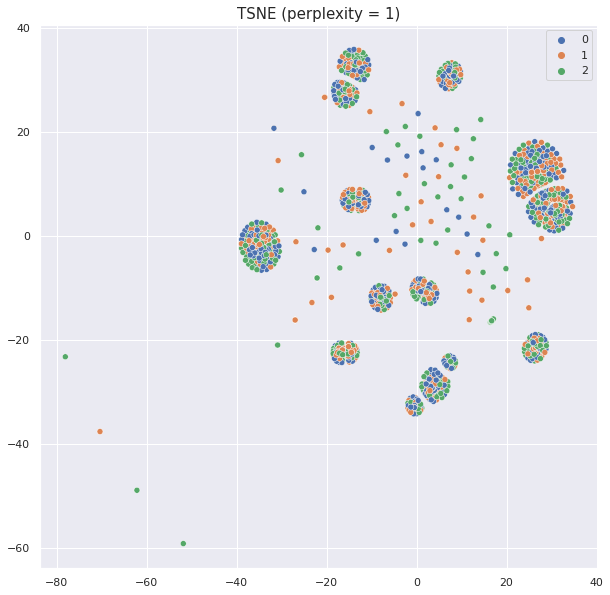

In [22]:
vectors_tsne = TSNE(n_components = 2, perplexity=1).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 1)", size = 15)
plt.show()

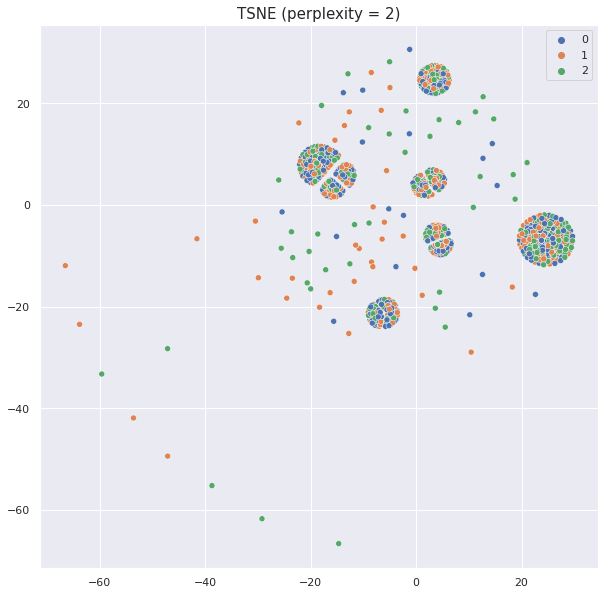

In [23]:
vectors_tsne = TSNE(n_components = 2, perplexity=2).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 2)", size = 15)
plt.show()

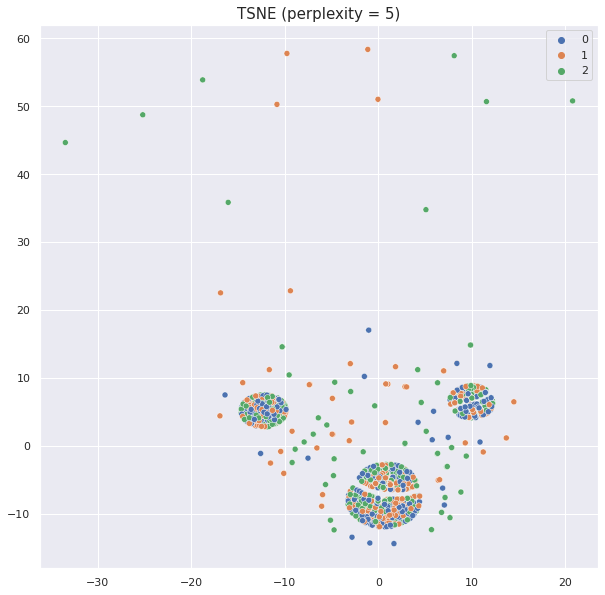

In [24]:
vectors_tsne = TSNE(n_components = 2, perplexity=5).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 5)", size = 15)
plt.show()

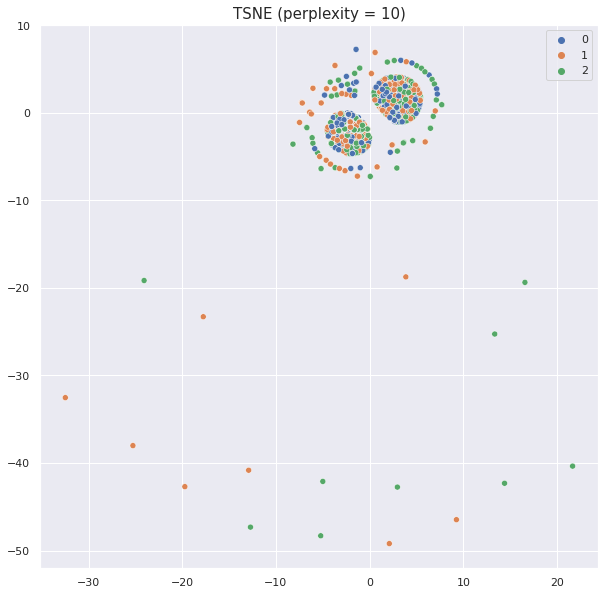

In [18]:
vectors_tsne = TSNE(n_components = 2, perplexity=10).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 10)", size = 15)
plt.show()

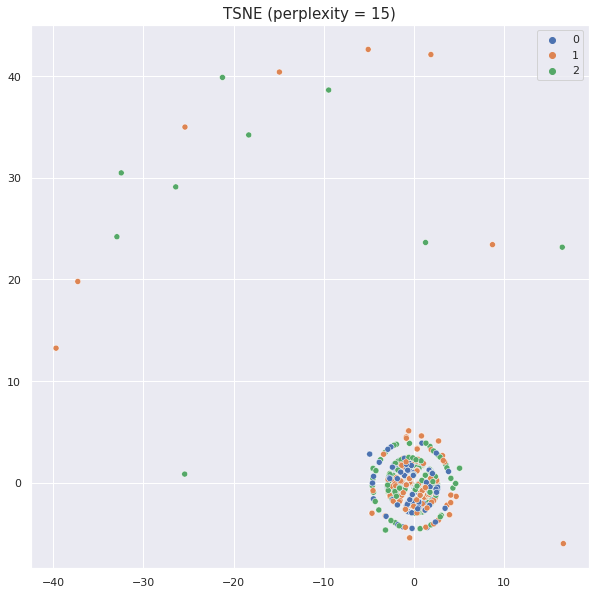

In [19]:
vectors_tsne = TSNE(n_components = 2, perplexity=15).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 15)", size = 15)
plt.show()

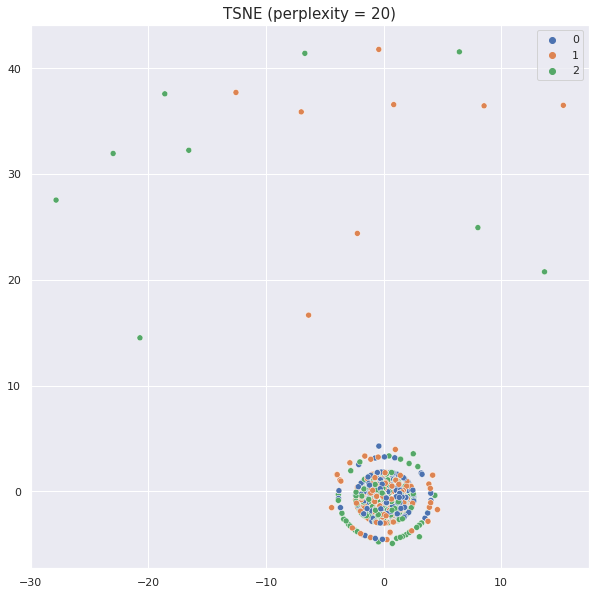

In [20]:
vectors_tsne = TSNE(n_components = 2, perplexity=20).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 20)", size = 15)
plt.show()

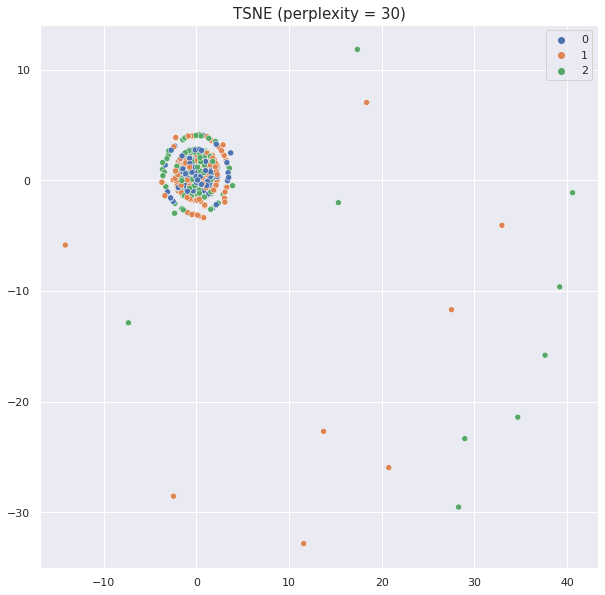

In [21]:
vectors_tsne = TSNE(n_components = 2, perplexity=30).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 30)", size = 15)
plt.show()

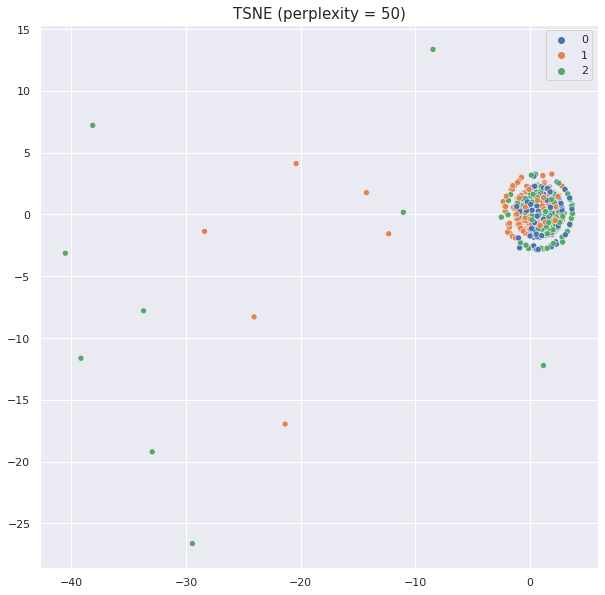

In [25]:
vectors_tsne = TSNE(n_components = 2, perplexity=50).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 50)", size = 15)
plt.show()

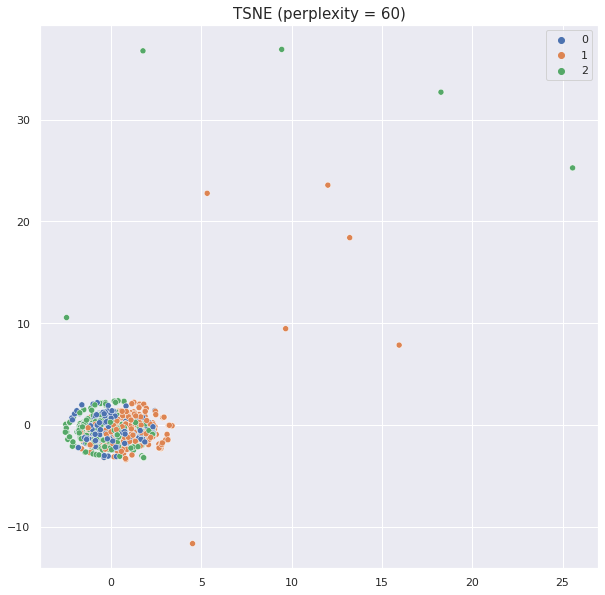

In [28]:
vectors_tsne = TSNE(n_components = 2, perplexity=60).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 60)", size = 15)
plt.show()

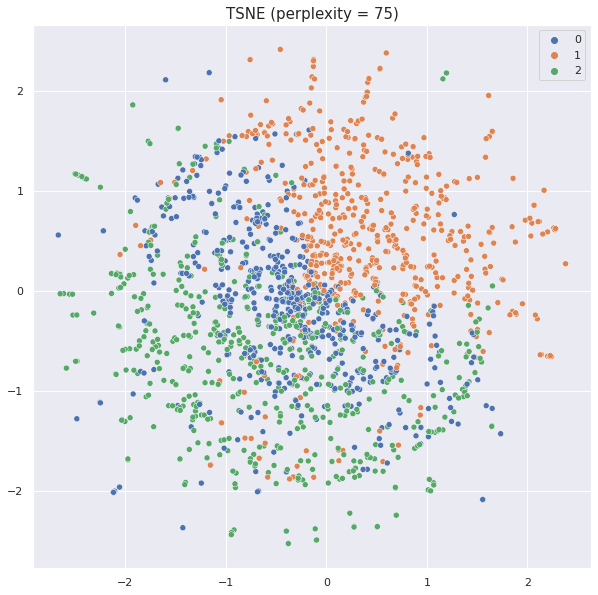

In [27]:
vectors_tsne = TSNE(n_components = 2, perplexity=75).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 75)", size = 15)
plt.show()

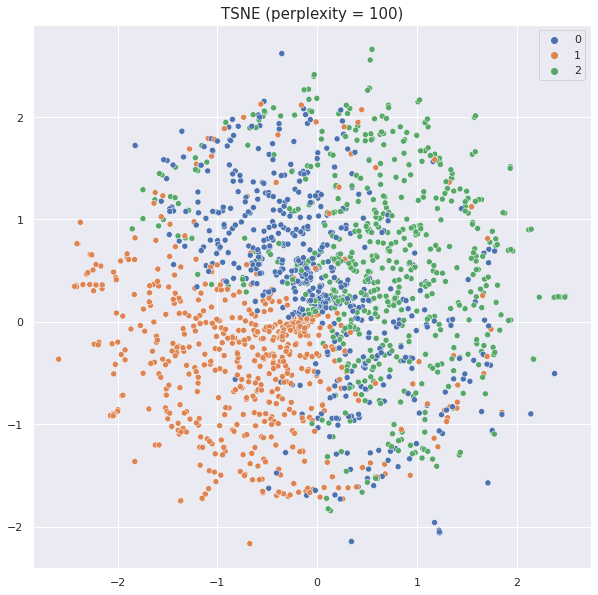

In [26]:
vectors_tsne = TSNE(n_components = 2, perplexity=100).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 100)", size = 15)
plt.show()

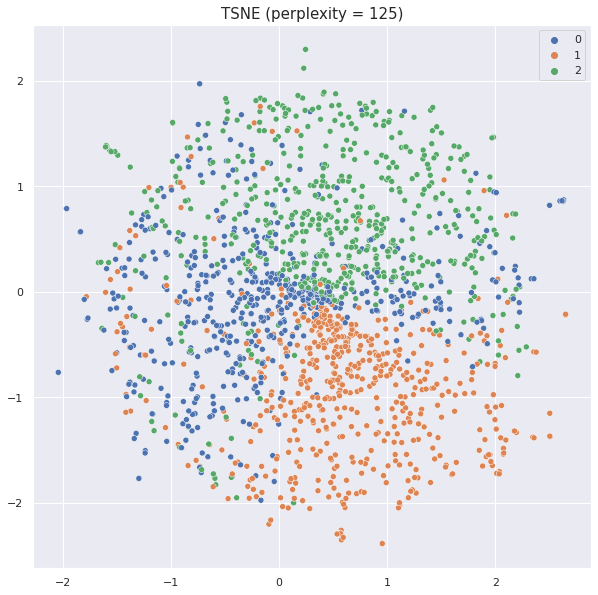

In [29]:
vectors_tsne = TSNE(n_components = 2, perplexity=125).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 125)", size = 15)
plt.show()

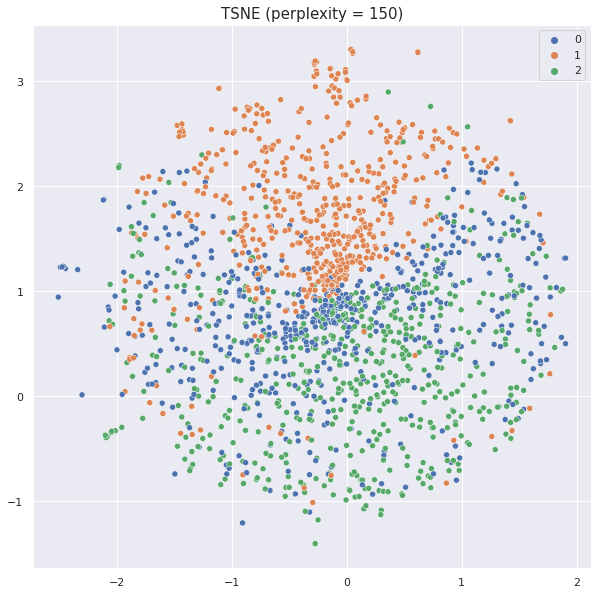

In [30]:
vectors_tsne = TSNE(n_components = 2, perplexity=150).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 150 )", size = 15)
plt.show()

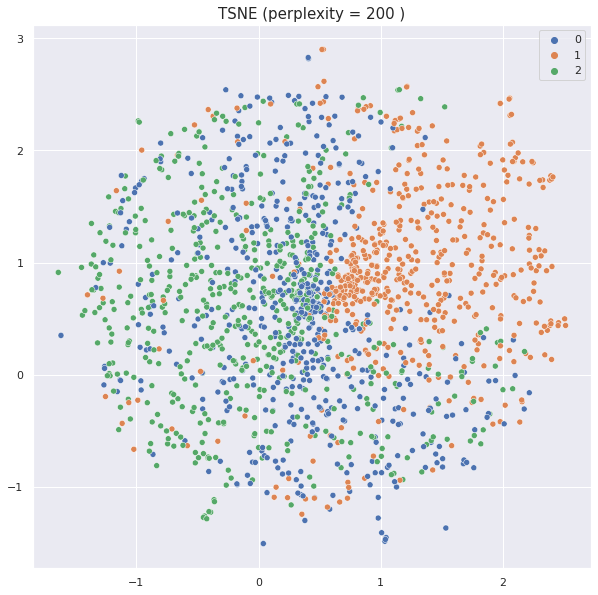

In [31]:
vectors_tsne = TSNE(n_components = 2, perplexity=200).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 200 )", size = 15)
plt.show()

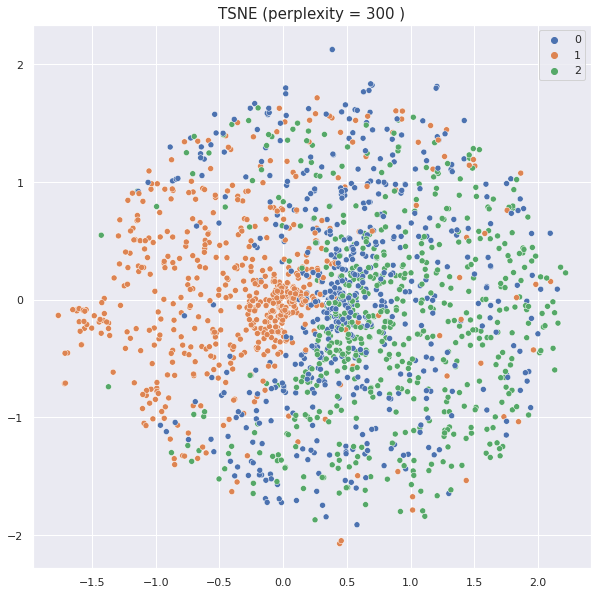

In [32]:
vectors_tsne = TSNE(n_components = 2, perplexity=300).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 300 )", size = 15)
plt.show()

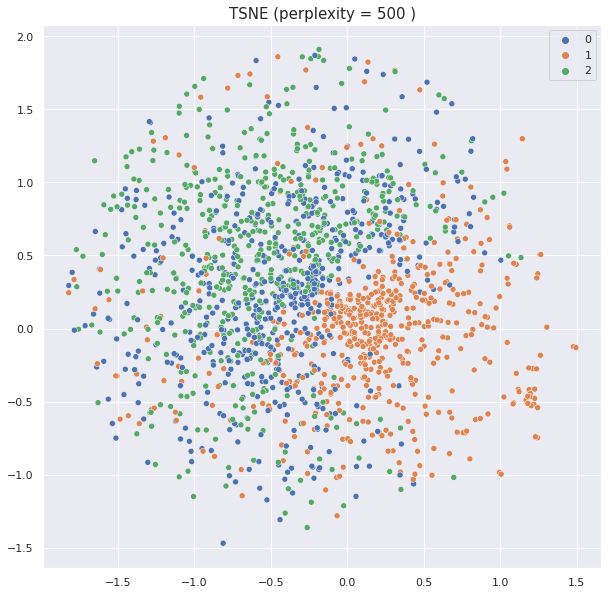

In [33]:
vectors_tsne = TSNE(n_components = 2, perplexity=500).fit_transform(X_train)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = vectors_tsne[:,0], y = vectors_tsne[:,1], hue = y_train, palette = 'deep')
ax.set_title( "TSNE (perplexity = 500 )", size = 15)
plt.show()

# **Explore neural network models**

In [2]:
cats = ['rec.sport.hockey', 'sci.electronics', 'rec.autos']
vectorizer = TfidfVectorizer()

#### **Fetch and prepare raw data**

In [4]:
news_train = np.array(fetch_20newsgroups(subset='train', categories=cats).data)
news_test = np.array(fetch_20newsgroups(subset='test', categories=cats).data)
news = np.concatenate((news_train, news_test), axis = 0) # Concatenating to ensure common vocabulary

X = vectorizer.fit_transform(news).toarray()
X_train = X[:1785].copy()
X_test = X[1785:].copy()

y_train = fetch_20newsgroups(subset='train', categories=cats).target
y_test = fetch_20newsgroups(subset='test', categories=cats).target

In [5]:
# print(news_train[0])

###### ***Check dimensions of TF-IDF vectors***


In [83]:
print(X_train.shape)
print(X_test.shape)

(1785, 33879)
(1188, 33879)


#### **Further pre-processing of raw data**

###### ***This is data before any pre-processing***

In [5]:
print(news[0])

From: gld@cunixb.cc.columbia.edu (Gary L Dare)
Subject: RUMOUR - Keenan signs with Rangers?
Nntp-Posting-Host: cunixb.cc.columbia.edu
Reply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)
Organization: PhDs In The Hall
Lines: 14


UPI Clarinet has just relayed a "scoop" from the Toronto Sun
(or was that Star?  I like the Star myself ...) that Iron Mike
Keenan has come to an agreement with the New York Rangers for
next season.  Interestingly, this comes the day after the Times
Sports had an editorial about how the Rangers need their own
Pat Riley ... who cares about what happens after next season?

gld
--
~~~~~~~~~~~~~~~~~~~~~~~~ Je me souviens ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gary L. Dare
> gld@columbia.EDU 			GO  Winnipeg Jets  GO!!!
> gld@cunixc.BITNET			Selanne + Domi ==> Stanley



###### ***Converting to lowercase***

In [6]:
for i in range(len(news)):
    news[i] = news[i].lower()

###### ***Make a backup of non-preprocessed news data***

In [7]:
news_raw = news.copy()

###### ***Word-tokenize the text data***

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

news = news.tolist()
for i in range(len(news)):
    news[i] = word_tokenize(news[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###### ***After performing word tokenization***

In [9]:
print(news[0])

['from', ':', 'gld', '@', 'cunixb.cc.columbia.edu', '(', 'gary', 'l', 'dare', ')', 'subject', ':', 'rumour', '-', 'keenan', 'signs', 'with', 'rangers', '?', 'nntp-posting-host', ':', 'cunixb.cc.columbia.edu', 'reply-to', ':', 'gld', '@', 'cunixb.cc.columbia.edu', '(', 'gary', 'l', 'dare', ')', 'organization', ':', 'phds', 'in', 'the', 'hall', 'lines', ':', '14', 'upi', 'clarinet', 'has', 'just', 'relayed', 'a', '``', 'scoop', "''", 'from', 'the', 'toronto', 'sun', '(', 'or', 'was', 'that', 'star', '?', 'i', 'like', 'the', 'star', 'myself', '...', ')', 'that', 'iron', 'mike', 'keenan', 'has', 'come', 'to', 'an', 'agreement', 'with', 'the', 'new', 'york', 'rangers', 'for', 'next', 'season', '.', 'interestingly', ',', 'this', 'comes', 'the', 'day', 'after', 'the', 'times', 'sports', 'had', 'an', 'editorial', 'about', 'how', 'the', 'rangers', 'need', 'their', 'own', 'pat', 'riley', '...', 'who', 'cares', 'about', 'what', 'happens', 'after', 'next', 'season', '?', 'gld', '--', '~~~~~~~~~~~~

###### ***Filter out punctuation***

In [10]:
for i in range(len(news)):
    news[i] = [word for word in news[i] if word.isalpha()]

###### ***After filtering punctuation***

In [11]:
print(news[0])

['from', 'gld', 'gary', 'l', 'dare', 'subject', 'rumour', 'keenan', 'signs', 'with', 'rangers', 'gld', 'gary', 'l', 'dare', 'organization', 'phds', 'in', 'the', 'hall', 'lines', 'upi', 'clarinet', 'has', 'just', 'relayed', 'a', 'scoop', 'from', 'the', 'toronto', 'sun', 'or', 'was', 'that', 'star', 'i', 'like', 'the', 'star', 'myself', 'that', 'iron', 'mike', 'keenan', 'has', 'come', 'to', 'an', 'agreement', 'with', 'the', 'new', 'york', 'rangers', 'for', 'next', 'season', 'interestingly', 'this', 'comes', 'the', 'day', 'after', 'the', 'times', 'sports', 'had', 'an', 'editorial', 'about', 'how', 'the', 'rangers', 'need', 'their', 'own', 'pat', 'riley', 'who', 'cares', 'about', 'what', 'happens', 'after', 'next', 'season', 'gld', 'je', 'me', 'souviens', 'gary', 'dare', 'gld', 'go', 'winnipeg', 'jets', 'go', 'gld', 'selanne', 'domi', 'stanley']


###### ***Make words lowercase***

In [12]:
for i in range(len(news)):
    news[i] = [word.lower() for word in news[i]]

###### ***After making lowercase***

In [13]:
print(news[0])

['from', 'gld', 'gary', 'l', 'dare', 'subject', 'rumour', 'keenan', 'signs', 'with', 'rangers', 'gld', 'gary', 'l', 'dare', 'organization', 'phds', 'in', 'the', 'hall', 'lines', 'upi', 'clarinet', 'has', 'just', 'relayed', 'a', 'scoop', 'from', 'the', 'toronto', 'sun', 'or', 'was', 'that', 'star', 'i', 'like', 'the', 'star', 'myself', 'that', 'iron', 'mike', 'keenan', 'has', 'come', 'to', 'an', 'agreement', 'with', 'the', 'new', 'york', 'rangers', 'for', 'next', 'season', 'interestingly', 'this', 'comes', 'the', 'day', 'after', 'the', 'times', 'sports', 'had', 'an', 'editorial', 'about', 'how', 'the', 'rangers', 'need', 'their', 'own', 'pat', 'riley', 'who', 'cares', 'about', 'what', 'happens', 'after', 'next', 'season', 'gld', 'je', 'me', 'souviens', 'gary', 'dare', 'gld', 'go', 'winnipeg', 'jets', 'go', 'gld', 'selanne', 'domi', 'stanley']


###### ***Download english stopwords***

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

###### ***Number of words in first news article before removing stopwords***

In [15]:
print(len(news[0]))

102


###### ***Remove stopwords from news data***

In [16]:
for i in range(len(news)):
    news[i] = [word for word in news[i] if not word in stop_words]

###### ***Number of words in first news article after removing stopwords***

In [17]:
print(len(news[0]))

64


###### ***First article after removing stopwords***

In [18]:
print(news[0])

['gld', 'gary', 'l', 'dare', 'subject', 'rumour', 'keenan', 'signs', 'rangers', 'gld', 'gary', 'l', 'dare', 'organization', 'phds', 'hall', 'lines', 'upi', 'clarinet', 'relayed', 'scoop', 'toronto', 'sun', 'star', 'like', 'star', 'iron', 'mike', 'keenan', 'come', 'agreement', 'new', 'york', 'rangers', 'next', 'season', 'interestingly', 'comes', 'day', 'times', 'sports', 'editorial', 'rangers', 'need', 'pat', 'riley', 'cares', 'happens', 'next', 'season', 'gld', 'je', 'souviens', 'gary', 'dare', 'gld', 'go', 'winnipeg', 'jets', 'go', 'gld', 'selanne', 'domi', 'stanley']


###### ***Perform stemming on words***

In [20]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

for i in range(len(news)):
    news[i] = [porter.stem(word) for word in news[i]]

###### ***Stemming gives some words as outputs which are not present in dictionary, so resorting to lemmatization***

In [21]:
print(news[0])

['gld', 'gari', 'l', 'dare', 'subject', 'rumour', 'keenan', 'sign', 'ranger', 'gld', 'gari', 'l', 'dare', 'organ', 'phd', 'hall', 'line', 'upi', 'clarinet', 'relay', 'scoop', 'toronto', 'sun', 'star', 'like', 'star', 'iron', 'mike', 'keenan', 'come', 'agreement', 'new', 'york', 'ranger', 'next', 'season', 'interestingli', 'come', 'day', 'time', 'sport', 'editori', 'ranger', 'need', 'pat', 'riley', 'care', 'happen', 'next', 'season', 'gld', 'je', 'souvien', 'gari', 'dare', 'gld', 'go', 'winnipeg', 'jet', 'go', 'gld', 'selann', 'domi', 'stanley']


###### ***Lemmatization on news data using SpaCy***

In [23]:
import spacy
nlp = spacy.load("en_core_web_sm")

for i in range(len(news)):
    news_article = ''
    for word in news[i]:
        news_article += word + ' '
    doc = nlp(news_article)
    news[i] = [word.lemma_ for word in doc]

###### ***Alternate lemmatization method: wordnet lemmatizer of nltk***

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

# for i in range(len(news)):
#     news[i] = [wnl.lemmatize(word) for word in news[i]]

###### ***Check text after lemmatization***

In [24]:
print(news[0])

['gld', 'gari', 'l', 'dare', 'subject', 'rumour', 'keenan', 'sign', 'ranger', 'gld', 'gari', 'l', 'dare', 'organ', 'phd', 'hall', 'line', 'upi', 'clarinet', 'relay', 'scoop', 'toronto', 'sun', 'star', 'like', 'star', 'iron', 'mike', 'keenan', 'come', 'agreement', 'new', 'york', 'ranger', 'next', 'season', 'interestingli', 'come', 'day', 'time', 'sport', 'editori', 'ranger', 'need', 'pat', 'riley', 'care', 'happen', 'next', 'season', 'gld', 'je', 'souvien', 'gari', 'dare', 'gld', 'go', 'winnipeg', 'jet', 'go', 'gld', 'selann', 'domi', 'stanley']


###### ***Now concatenate lemmatized words to recreate news articles***

In [25]:
for i in range(len(news)):
    news_concat = ''
    for word in news[i]:
        news_concat += word + ' '
    news[i] = news_concat

###### ***Convert back news to numpy ndarray***

In [26]:
news = np.array(news)

###### ***Vectorize the processed news***

In [27]:
X = vectorizer.fit_transform(news).toarray()
X_train = X[:1785].copy()
X_test = X[1785:].copy()

###### ***Check the dimensions of the TF-IDF vectors***<br>
###### ***(Dimensions reduced from 33,879 to 17,877 after pre-processing)***

In [29]:
print(X_train.shape)
print(X_test.shape)

(1785, 17877)
(1188, 17877)


#### **Fetch and prepare data (without headers and footers)**

In [3]:
news_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats).data
news_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats).data

X_train = vectorizer.fit_transform(news_train).toarray()
X_test = vectorizer.transform(news_test).toarray()

y_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=cats).target
y_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=cats).target

In [4]:
# print(news_train[0])

#### **Convert the TF-IDF vectors from sparse to dense, and make labels one-hot**

In [87]:
y_train
# class 0: rec.auto, class 1: rec.sport.hockey, class 2: rec.sci.electronics

array([1, 0, 2, ..., 0, 1, 2])

In [88]:
# print value_counts of each class in training data
# np.array(np.unique(y_train, return_counts=True)).T

In [72]:
y_train_oh= to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh = y_train_oh.astype(int)
y_test_oh = y_test_oh.astype(int)

In [90]:
# y_train_oh
# Labels converted to OneHot

#### **Some tunable parameters**

In [73]:
act = 'tanh'
batch_len = 32
opt = 'adam'
epoch = 20
val_split = 0.2

#### **Define model architecture**

In [92]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(32, activation = act, input_dim = X_train.shape[1]))
model.add(Dense(32, activation = act))
model.add(Dense(32, activation = act))
model.add(Dense(3, activation = 'softmax')) # for multi-class classification
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1084160   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,086,371
Trainable params: 1,086,371
Non-trainable params: 0
_________________________________________________________________


#### **Train the model**

In [93]:
history = model.fit(X_train, y_train_oh, epochs = epoch, batch_size = batch_len, verbose = 0, callbacks=[TqdmCallback(verbose=1)], validation_split=val_split)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

#### **Evaluate the model**

In [94]:
print(X_train.shape)
print(X_test.shape)

(1785, 33879)
(1188, 33879)


In [88]:
y_pred = model.predict(X_test)

# make predicted values one-hot
for i in range(len(y_pred)):
    arg_max = y_pred[i].argmax()
    y_pred[i] = np.array([0, 0, 0])
    y_pred[i][arg_max] = 1
y_pred = y_pred.astype(int)

print(classification_report(y_test_oh, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       396
           1       1.00      0.99      1.00       399
           2       0.97      0.98      0.97       393

   micro avg       0.98      0.98      0.98      1188
   macro avg       0.98      0.98      0.98      1188
weighted avg       0.98      0.98      0.98      1188
 samples avg       0.98      0.98      0.98      1188



In [96]:
y_pred

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

###### ***Results for cleaned data (after removing headers and footers)***

In [78]:
# print(classification_report(y_test_oh, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       396
           1       0.96      0.92      0.94       399
           2       0.92      0.87      0.89       393

   micro avg       0.90      0.90      0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188
 samples avg       0.90      0.90      0.90      1188



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


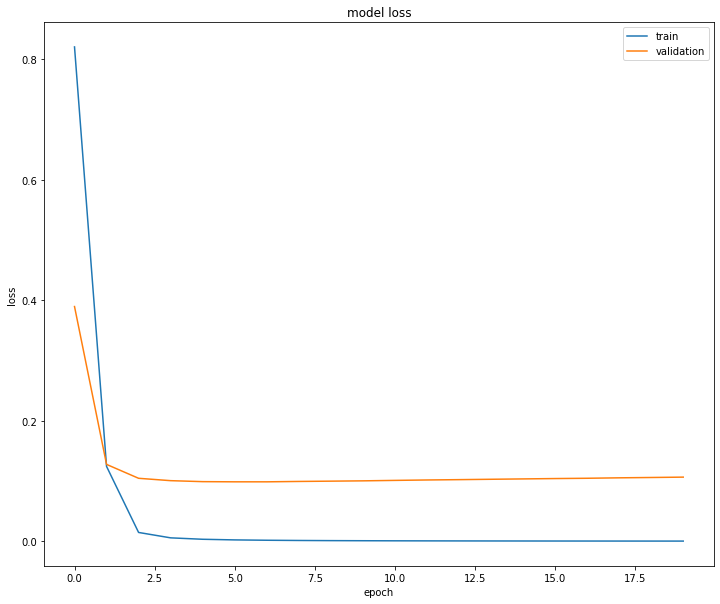

In [97]:
# Print the training and validation losses
print(history.history.keys())
plt.subplots(1,1,figsize=(12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


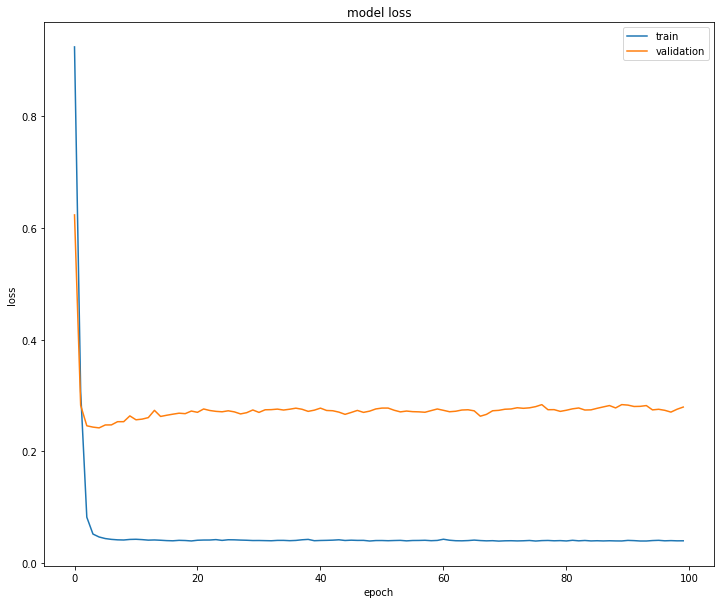

In [79]:
# Print the training and validation losses
print(history.history.keys())
plt.subplots(1,1,figsize=(12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### **Saving and loading models**

In [80]:
# Save and zip model
model_name = 'modelr_97_tanh_32_20_processed'
model.save('modelr_97_tanh_32_20_processed')
!zip -r modelr_97_tanh_32_20_processed.zip modelr_97_tanh_32_20_processed

INFO:tensorflow:Assets written to: modelr_97_tanh_32_20_processed/assets
  adding: modelr_97_tanh_32_20_processed/ (stored 0%)
  adding: modelr_97_tanh_32_20_processed/saved_model.pb (deflated 89%)
  adding: modelr_97_tanh_32_20_processed/keras_metadata.pb (deflated 89%)
  adding: modelr_97_tanh_32_20_processed/variables/ (stored 0%)
  adding: modelr_97_tanh_32_20_processed/variables/variables.index (deflated 66%)
  adding: modelr_97_tanh_32_20_processed/variables/variables.data-00000-of-00001 (deflated 22%)
  adding: modelr_97_tanh_32_20_processed/assets/ (stored 0%)


In [86]:
# Unzip and load model
model_name = 'modelr_98_tanh_8_20'
!unzip 'modelr_98_tanh_8_20.zip' -d 'modelr_98_tanh_8_20'
model = keras.models.load_model('modelr_98_tanh_8_20/modelr_98_tanh_8_20')

Archive:  modelr_98_tanh_8_20.zip
   creating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/
  inflating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/saved_model.pb  
   creating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/assets/
  inflating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/keras_metadata.pb  
   creating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/variables/
  inflating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/variables/variables.data-00000-of-00001  
  inflating: modelr_98_tanh_8_20/modelr_98_tanh_8_20/variables/variables.index  


# **More experiments**

#### **These are the results for pre-processed news data (after lemmatization)**

In [77]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(32, activation = act, input_dim = X_train.shape[1]))
model.add(Dense(32, activation = act))
model.add(Dense(32, activation = act))
model.add(Dense(3, activation = 'softmax')) # for multi-class classification
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                684512    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 686,723
Trainable params: 686,723
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(X_train, y_train_oh, epochs = epoch, batch_size = batch_len, verbose = 0, callbacks=[TqdmCallback(verbose=1)], validation_split = val_split)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

#### **Code for pickling**

In [28]:
X.shape

(2973, 17877)

In [30]:
with open('X_processed.pickle', 'wb') as handle:
    pickle.dump(X, handle)

In [ ]:
with open('X_processed.pickle', 'rb') as handle:
    X = pickle.load(handle)